              ts_code   open   high    low  close  pre_close  change  pct_chg  \
trade_date                                                                      
2019-06-28  000001.SZ  13.73  13.79  13.58  13.78      13.71    0.07   0.5106   
2019-06-27  000001.SZ  13.50  13.85  13.45  13.71      13.37    0.34   2.5430   
2019-06-26  000001.SZ  13.27  13.50  13.19  13.37      13.29    0.08   0.6020   
2019-06-25  000001.SZ  13.72  13.72  13.07  13.43      13.69   -0.26  -1.8992   
2019-06-24  000001.SZ  13.69  13.83  13.61  13.69      13.64    0.05   0.3666   

                   vol       amount  
trade_date                           
2019-06-28   498093.69   682679.970  
2019-06-27   925074.94  1270042.461  
2019-06-26   546504.76   731207.282  
2019-06-25  1469227.07  1954855.785  
2019-06-24   659572.85   904433.349  
            close      upper      lower
trade_date                             
2019-06-28  13.78        NaN        NaN
2019-06-27  13.71        NaN        NaN
2019-0

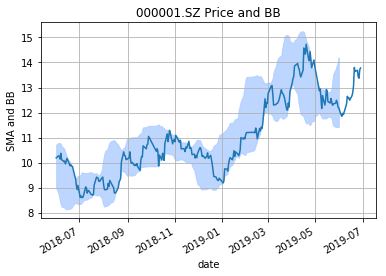

In [13]:
import tushare as ts
import pandas as pd
import numpy as np
import talib
import pandas as pd
import matplotlib.pyplot as plt


pro=ts.pro_api()
df_whole=pro.daily(ts_code="000001.SZ",start_date="20180601",end_date="20190630")

df_whole['trade_date'] = pd.to_datetime(df_whole['trade_date'],format='%Y%m%d')
df_whole.set_index('trade_date',inplace=True)
print(df_whole.head())


symbol="000001.SZ"
df=df_whole["close"]
# calculate Simple Moving Average with 20 days window
sma = df.rolling(window=20).mean()
# calculate the standar deviation
rstd = df.rolling(window=20).std()
upper_band = sma + 2 * rstd
upper_band=upper_band.to_frame()
upper_band=upper_band.rename({'close': 'upper'}, axis=1) 
lower_band = sma - 2 * rstd
lower_band=lower_band.to_frame()
lower_band=lower_band.rename({'close': 'lower'}, axis=1) 

BB_df=pd.concat([df,upper_band, lower_band], axis=1)
print(BB_df)
BB_df.dropna(inplace=True)
print(BB_df)

ax = df.plot(title='{} Price and BB'.format(symbol))
ax.fill_between(BB_df.index, BB_df['lower'], BB_df['upper'], color='#ADCCFF', alpha='0.8')
ax.set_xlabel('date')
ax.set_ylabel('SMA and BB')
ax.grid()
plt.show()